CSCI P-556: Applied Machine Learning

Fall 2019

Assignment 4

Due: 11:59PM, December 6, 2019

Read dataset

In [0]:
import pandas as pd
train = pd.read_csv('a4-train.csv', index_col=0)
test = pd.read_csv('a4-test.csv', index_col=0)
X_train=train.iloc[:,:-1]
X_test=test.iloc[:,:-1]
y_train=train.iloc[:,-1]
y_test=test.iloc[:,-1]

Task 1: Perform exploratory data analysis (15 points)

In [5]:
import numpy as np
#https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
print(train.head())
print("\nNumber of columns with missing values:",len(train.columns[train.isnull().any()]))
print("\nNumber of duplicate rows:", len(train[train.duplicated()]))

   feat_0  feat_1  feat_2  feat_3  ...  feat_497  feat_498  feat_499  labels
0     485     423     504     493  ...       474       567       538       0
1     483     499     520     467  ...       485       492       477       1
2     487     486     495     481  ...       493       421       488       1
3     480     427     531     458  ...       516       495       469       0
4     491     472     430     463  ...       468       497       435       1

[5 rows x 501 columns]

Number of columns with missing values: 0

Number of duplicate rows: 0


Correlation Matrix

             feat_0    feat_1    feat_2  ...  feat_497  feat_498  feat_499
feat_0    1.000000  0.042789 -0.022897  ... -0.033386  0.008648 -0.046535
feat_1    0.042789  1.000000 -0.008173  ... -0.006259 -0.001824  0.041259
feat_2   -0.022897 -0.008173  1.000000  ...  0.037516  0.022287  0.020370
feat_3    0.017871  0.020494 -0.009640  ... -0.003627 -0.014491 -0.000589
feat_4   -0.003337  0.029011  0.007198  ...  0.012479  0.026136  0.010764
...            ...       ...       ...  ...       ...       ...       ...
feat_495 -0.034734  0.018728  0.026388  ... -0.021698 -0.030119 -0.012242
feat_496  0.013165  0.043230  0.010825  ...  0.009619 -0.002916  0.000442
feat_497 -0.033386 -0.006259  0.037516  ...  1.000000 -0.012177  0.028701
feat_498  0.008648 -0.001824  0.022287  ... -0.012177  1.000000  0.013563
feat_499 -0.046535  0.041259  0.020370  ...  0.028701  0.013563  1.000000

[500 rows x 500 columns]


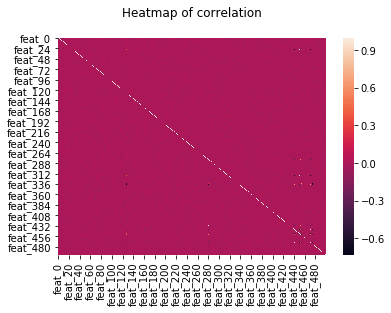

In [36]:
import seaborn as sns
a=X_train.corr()
print('Correlation Matrix\n\n',a)

sns.heatmap(a)
plt.title("Heatmap of correlation\n")
plt.show()

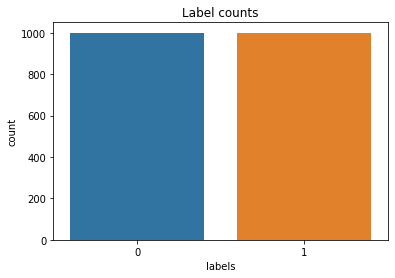

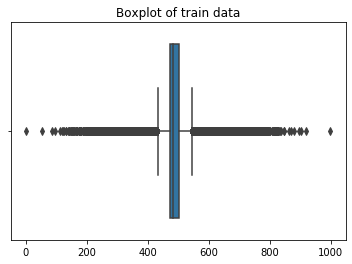

In [87]:
from matplotlib import pyplot as plt
sns.countplot(y_train)
plt.title("Label counts")
plt.show()

sns.boxplot(X_train)
plt.title("Boxplot of train data")
plt.show()

Variance plots



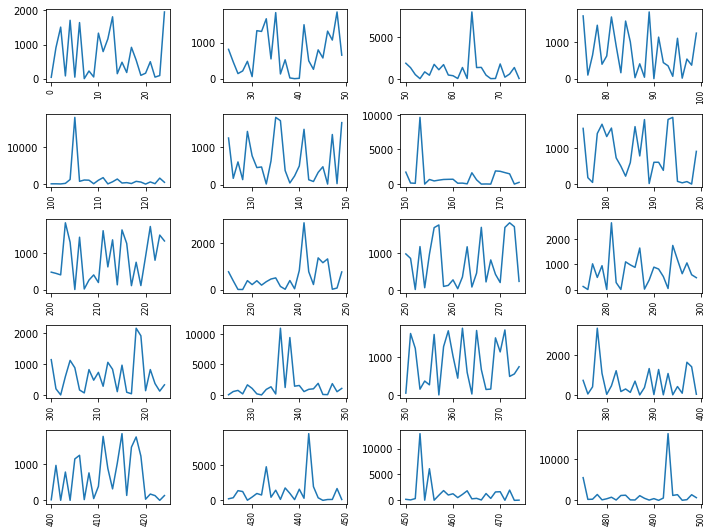

In [38]:
print("Variance plots\n")
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10,7.5))
for i in range(5):
  for j in range(4):
    cols=cols=[z for z in train.columns[25*(4*i+j):25*(4*i+j+1)]]
    var=[np.var(X_train[z]) for z in cols]
    axes[i,j].plot(list(range(25*(4*i+j),25*(4*i+j+1))),var)

for i in range(5):
  for j in range(4):
    for tick in axes[i,j].get_xticklabels():
      tick.set_rotation(90)
      tick.set_fontsize(7.5)

fig.tight_layout()

# # plt.subplot(1,1,1)
# cols=[i for i in X_train.columns[:25]]
# a=list(range(0,25))
# X=dc(X_train)
# X=X.iloc[:,:25]
# X.boxplot(column=a,grid=False, rot=90,fontsize=5)
# plt.show()
# plt.subplot(2,1,1)
# cols=[i for i in train.columns[26:50]]
# train.boxplot(column=cols,grid=False, rot=90)
# plt.show()

Task 2: Use scikit-learn's logistic regression to establish a baseline model. We are not expecting this model to perform well, we just want to know what is the highest accuracy that we can achieve without doing any feature engineering and/or parameter tuning. (5 points)

In [84]:
def lr(X_train,y_train,X_test,y_test):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import accuracy_score
  LR = LogisticRegression(solver='lbfgs',random_state=43,max_iter=3900)
  LR.fit(X_train,y_train)
  y_pred=LR.predict(X_test)
  from sklearn.metrics import accuracy_score
  # print('LR:',accuracy_score(y_test,y_pred))
  return accuracy_score(y_test, y_pred)

print(lr(X_train1, y_train,X_test1,y_test))

0.5933333333333334


Task 3: Feature engineering. On this task you'll write code to modify your features such that the model can achieve a higher accuracy. You are free to modify the data as you want, but a rationale has to be provided for each modification. Additionally, if you are using anything that has not been convered in class, write a brief description of how the function works. Note that copy/pasting a function's docstring is not what we are asking and we will take off points if this is what you do. (20 points)

In [0]:
# from sklearn.preprocessing import RobustScaler
# scaler=RobustScaler()
# max: 55 60.7

# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# max: 4 60.5

# from sklearn.preprocessing import Normalizer
# scaler=Normalizer()
# max: 3 60.2

# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# # max: 4 62
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

# best,index=0,0
# for i in range(1,X_train.shape[1]):
#   X_train1,X_test1=dc(X_train),dc(X_test)
#   pca = PCA(n_components=i)
#   X_train1=pca.fit_transform(X_train1)
#   X_test1=pca.transform(X_test1)
#   a=lr(X_train1, y_train,X_test1,y_test)
#   # print(i,'\t',a)
#   if best<=a:
#     best=a
#     index=i
# print(index,best)

# # print(X_train.shape[1],X_test.shape[1])
# corr_matrix=X_train.corr().abs()
# upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.90
# to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# # Drop features 
# X_train.drop(to_drop, axis=1, inplace=True)
# X_test.drop(to_drop, axis=1, inplace=True)
# print(X_train.shape[1],X_test.shape[1])
# X_test['feature_1']=X_test.sum(axis=1)
# X_train['feature_1']=X_train.sum(axis=1)

# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from copy import deepcopy as dc
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=5)
X_train1=pca.fit_transform(dc(X_train))
X_test1=pca.transform(dc(X_test))

# Answer:
For feature engineering, Principle Component Analysis is done. There are 500 hundred features in the data, out of which only a handful of the features had a significant impact on the target variable. Through PCA, all the insignificant features of the data are ignored. In this data, the number of features that I found to give the best accuracy for all the models is 5.

In addition to PCA, various scaling methods were also tried. The scalings didn't show a huge change in the accuracies of the models.

Task 4: Model building & evaluation. Train at least 4 models:


1.   Neural network (any type of NN is fine)
2.   Decision tree (can be a plain decision tree, random forest, gradient boosted trees, etc.)
3.   Support vector machine
4.   Your choice of Naive Bayes or K-nearest neighbors

For model 4, briefly (no more than 2 paragraphs) describe how the model works. 

Part of your grade will depend on how your best model performs against the best model of all the classmates, as determined by the accuracy achieved using the test set. You are encouraged to share your best model's accuracy on Piazza, but not which feature engineering or model tuning steps you took to achieve it. (60 points)

In [82]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
def nn(X_train,y_train,X_test,y_test):
  from sklearn.neural_network import MLPClassifier
  from warnings import filterwarnings
  filterwarnings('ignore')
  clf = MLPClassifier(hidden_layer_sizes=(64,2))
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  test_score=clf.score( X_test,y_test )
  from sklearn.metrics import accuracy_score
  print('NN:',accuracy_score(y_test,y_pred))
nn(X_train1,y_train,X_test1,y_test)

NN: 0.8316666666666667


In [59]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
def rf(X_train,y_train,X_test,y_test):
  from sklearn.ensemble import RandomForestClassifier
  clf = RandomForestClassifier(n_estimators=30)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  from sklearn.metrics import accuracy_score
  print('RF:',accuracy_score(y_test,y_pred))  

rf(X_train1,y_train,X_test1,y_test)

RF: 0.8983333333333333


In [83]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
def svm1(X_train,y_train,X_test,y_test):
  from sklearn.svm import SVC
  # clf = svm.SVC(gamma='auto',kernel='linear',cache_size=7000)
  # clf=SVC(gamma='auto') 
  clf=SVC(gamma='scale')
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  from sklearn.metrics import accuracy_score
  print('SVM:',accuracy_score(y_test,y_pred))

svm1(X_train1,y_train,X_test1,y_test)

SVM: 0.8366666666666667


In [68]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
def knn(X_train,y_train,X_test,y_test):
  from sklearn.neighbors import KNeighborsClassifier
  clf=KNeighborsClassifier(n_neighbors=5)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  test_score=clf.score( X_test,y_test )
  from sklearn.metrics import accuracy_score
  print('KNN:',accuracy_score(y_test,y_pred))

knn(X_train1,y_train,X_test1,y_test)

KNN: 0.8916666666666667


# Answer:
K Nearest Neighbors(KNN) algorithm is a non-parametric model. This implies that the structure of the model is independent of the distribution of the data. Since, the real world data does not follow the theoretical assumptions, the non-parametric feature makes it one of the simplest and the most widely used classification algorithm which even with simplicity produces very accurate results.

While training, the algorithm makes groups of each of the classes. The value of K defines the number of neighbors that we have to find around the datapoint under consideration. This algorithm can be visualized to draw a circle of the smallest size that fits in 'K' point of either of the classes. From the points covered within the circle, the frequency of the data points of each class is calculated. The point is classified into the class that has more frequency in the drawn circle.